In [2]:
image_size = 224

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import numpy
import scipy

C:\Users\LENOVO\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

In [5]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
#Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000017CBDD90E80> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDDA3588> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDDA33C8> False
<keras.layers.pooling.MaxPooling2D object at 0x0000017CBDDC6EF0> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDDC67B8> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDDE7278> False
<keras.layers.pooling.MaxPooling2D object at 0x0000017CBDDFD9E8> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDE187B8> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDE347F0> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDE4C668> False
<keras.layers.pooling.MaxPooling2D object at 0x0000017CBDE65940> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDE81780> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDE997B8> False
<keras.layers.convolutional.Conv2D object at 0x0000017CBDEB6320> False
<ker

In [6]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(19, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               12544500  
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                9519      
Total params: 27,268,707
Trainable params: 19,633,443
Non-trainable params: 7,635,264
_________________________________________________________________


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 1
val_batchsize = 1
# train_data='C:/Users/LENOVO/MajorProject/'
# val_data='C:/Users/LENOVO/MajorProject/val'
train_generator = train_datagen.flow_from_directory(
        directory=r'SplitData/train_data/',
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        classes=["airport","beach","bridge","commercial","desert","farmland","footballfield","forest","industrial","meadow",
                "mountain","park","parking","pond","port","railwaystation","residential","river","viaduct"],
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        directory=r'SplitData/val_data',
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        classes=["airport","beach","bridge","commercial","desert","farmland","footballfield","forest","industrial","meadow",
                "mountain","park","parking","pond","port","railwaystation","residential","river","viaduct"],
        class_mode='categorical',
        shuffle=False)

Found 830 images belonging to 19 classes.
Found 103 images belonging to 19 classes.


In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:

# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 


Epoch 1/20
830/830 [==============================] - 193s 232ms/step - loss: 1.8947 - acc: 0.3855 - val_loss: 0.9984 - val_acc: 0.6602
Epoch 2/20
830/830 [==============================] - 192s 231ms/step - loss: 1.1687 - acc: 0.6157 - val_loss: 1.4338 - val_acc: 0.5631
Epoch 3/20
830/830 [==============================] - 192s 231ms/step - loss: 0.8444 - acc: 0.7434 - val_loss: 0.5983 - val_acc: 0.8155
Epoch 4/20
830/830 [==============================] - 192s 231ms/step - loss: 0.9375 - acc: 0.7578 - val_loss: 0.8705 - val_acc: 0.8155
Epoch 5/20
830/830 [==============================] - 192s 231ms/step - loss: 0.9081 - acc: 0.8072 - val_loss: 1.8186 - val_acc: 0.7767
Epoch 6/20
830/830 [==============================] - 192s 231ms/step - loss: 0.8716 - acc: 0.8241 - val_loss: 2.1359 - val_acc: 0.7670
Epoch 7/20
830/830 [==============================] - 192s 231ms/step - loss: 0.8644 - acc: 0.8325 - val_loss: 2.2862 - val_acc: 0.7573
Epoch 8/20
830/830 [============================

In [11]:
# Save the model
model.save('small_last20.h5')

In [12]:
import matplotlib.pyplot as plt

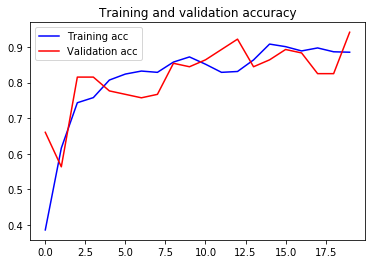

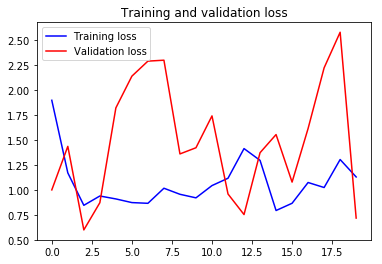

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()